In [1]:
import urllib
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib.request.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)
print(len(df))

/home/hyungook/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


8124


In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:


num_columns = df.shape[1]
map_dic = {}
for i in range(num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])



In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [5]:
for i in range(1, num_columns):
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j] = 0
        else:
            map_dic_sub[j] = j / float(N - 1)        
    df[i] = df[i].map(map_dic_sub)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,1,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,1,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [7]:
data_df = df.iloc[:, 1:]

In [8]:
data_df.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
1,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.166667
2,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.125,0.2,0.333333
3,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.00,0.000,0.0,0.000000
4,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.25,0.125,0.4,0.166667


In [9]:
data_array = data_df.as_matrix()

In [10]:
print(type(data_array), data_array.shape)

<class 'numpy.ndarray'> (8124, 22)


In [11]:
label_df = df.iloc[:, 0:1]

In [12]:
label_df.head()

,0
0,0
1,1
2,1
3,0
4,1


In [13]:
label_array = label_df.as_matrix()

In [14]:
print(type(label_array), label_array.shape)

<class 'numpy.ndarray'> (8124, 1)


In [15]:
label_array_one_hot = []
for i in label_array:
    if i == 0:
        one_hot = [1, 0]
    else:
        one_hot = [0, 1]
    label_array_one_hot.append(one_hot)    

In [16]:
label_array_one_hot =  np.array(label_array_one_hot)

In [17]:
print(type(label_array_one_hot), label_array_one_hot.shape)

<class 'numpy.ndarray'> (8124, 2)


In [18]:
train = {'data': None, 'labels': None}
validation = {'data': None, 'labels': None}
test = {'data': None, 'labels': None}

In [19]:
import random
pick = random.random()
train_data = []
train_labels = []
validation_data = []
validation_labels = []
test_data = []
test_labels = []
for i in range(len(data_array)):
    pick = random.random()
    if pick < 0.80:
        train_data.append(data_array[i])
        train_labels.append(label_array_one_hot[i])
    elif pick >= 0.80 and pick < 0.85:
        validation_data.append(data_array[i])
        validation_labels.append(label_array_one_hot[i])
    elif pick >= 0.85:
        test_data.append(data_array[i])
        test_labels.append(label_array_one_hot[i])
        
train['data'] = np.array(train_data)
train['labels'] = np.array(train_labels)
validation['data'] = np.array(validation_data)
validation['labels'] = np.array(validation_labels)
test['data'] = np.array(test_data)
test['labels'] = np.array(test_labels)

In [20]:
print(train['data'].shape, train['labels'].shape)

(6508, 22) (6508, 2)


In [21]:
print(validation['data'].shape, validation['labels'].shape)

(389, 22) (389, 2)


In [22]:
print(test['data'].shape, test['labels'].shape)

(1227, 22) (1227, 2)


Total batch: 326
Epoch:  0, Train Error: 7.75915, Validation Error: 9.14858, Test Accuracy: 0.49552
Epoch:  1, Train Error: 1.03751, Validation Error: 0.91797, Test Accuracy: 0.80114
Epoch:  2, Train Error: 0.50352, Validation Error: 0.40689, Test Accuracy: 0.86227
Epoch:  3, Train Error: 0.23879, Validation Error: 0.19374, Test Accuracy: 0.90383
Epoch:  4, Train Error: 0.14101, Validation Error: 0.11286, Test Accuracy: 0.93317
Epoch:  5, Train Error: 0.10313, Validation Error: 0.07436, Test Accuracy: 0.94621
Epoch:  6, Train Error: 0.08664, Validation Error: 0.05708, Test Accuracy: 0.95192
Epoch:  7, Train Error: 0.07749, Validation Error: 0.04875, Test Accuracy: 0.95925
Epoch:  8, Train Error: 0.07413, Validation Error: 0.04445, Test Accuracy: 0.96251
Epoch:  9, Train Error: 0.07242, Validation Error: 0.04231, Test Accuracy: 0.96170
Epoch: 10, Train Error: 0.06721, Validation Error: 0.03899, Test Accuracy: 0.96414
Epoch: 11, Train Error: 0.06158, Validation Error: 0.03586, Test Accur

Epoch: 99, Train Error: 0.00010, Validation Error: 0.00012, Test Accuracy: 1.00000
[1 1 1 ..., 1 0 1]
[1 1 1 ..., 1 0 1]


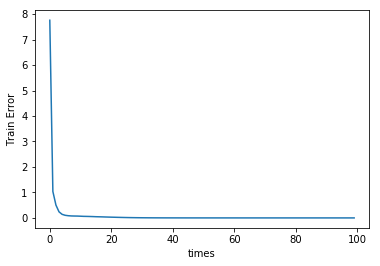

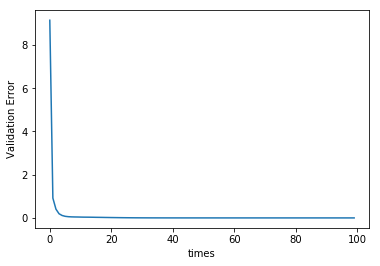

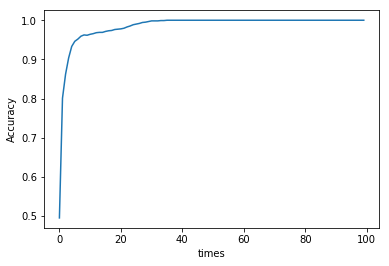

Number of False Prediction: 0


In [42]:
import tensorflow as tf
import math
import matplotlib.pyplot as plt

batch_size = 20 # 한 번에 네크워크에 집어 넣어 처리할 데이터의 양을 결정, 수치가 작아질 수록 총 연산의 수가 증가해 결과 값의 수정이  
                #많이 이루어 지기 떄문에 적당히 작은 값을 사용한다.
training_epochs = 100 # 학습 진행 횟수
learning_rate = 0.05 #학습률

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 22 # 데이터는 총 22개의 Column으로 이루어짐
n_hidden_1 = 20 # 총 2개의 hidden layer를 사용하며 각 레이어의 노드의 수는 5, 10, 15, 20, 25 로 테스트를 진행한 결과 연산 속도가 빠르고
                # 정확도 100%에 일찍 도달한 20을 사용
n_hidden_2 = 20 
n_classes = 2 # 총 클래스의 수는 두 개(독버섯, 식용버섯)
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2nd Hidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(len(train['data'])/float(batch_size)))
    print("Total batch: %d" % total_batch)
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: train['data'], y_target: train['labels']})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: validation['data'], y_target: validation['labels']})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: test['data'], y_target: test['labels']})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_data = train['data'][i*batch_size: (i+1)*batch_size]
            batch_labels = train['labels'][i*batch_size: (i+1)*batch_size]
            sess.run(optimizer, feed_dict={x: batch_data, y_target: batch_labels})
            
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:test['data']})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:test['labels']})

    print(prediction)
    print(ground_truth)

    for i in range(len(test['data'])):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
    plt.plot(train_error_list);
    plt.ylabel('Train Error');
    plt.xlabel('times');
    plt.show();
    plt.plot(validation_error_list);
    plt.ylabel('Validation Error');
    plt.xlabel('times');
    plt.show();
    plt.plot(test_accuracy_list);
    plt.ylabel('Accuracy');
    plt.xlabel('times');
    plt.show();
    print("Number of False Prediction:", len(diff_index_list))
